In [1]:
%pylab inline
from skimage import data, color, transform, io, filters, morphology, exposure
from skimage.transform import radon, rotate, hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte



Populating the interactive namespace from numpy and matplotlib


Przykład steganografii. W ostatnich bitach pikseli oryginalnego obrazu zostaje zakodowana informacja obrazu, który ukrywamy. 

--2019-03-12 22:56:58--  https://i.imgur.com/qiG7Oxj.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7959 (7.8K) [image/jpeg]
Saving to: ‘qiG7Oxj.jpg’

qiG7Oxj.jpg         100%[===================>]   7.77K  --.-KB/s    in 0s      

2019-03-12 22:56:59 (78.4 MB/s) - ‘qiG7Oxj.jpg’ saved [7959/7959]

--2019-03-12 22:57:00--  https://i.imgur.com/ZX4xwvw.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27781 (27K) [image/jpeg]
Saving to: ‘ZX4xwvw.jpg’

ZX4xwvw.jpg         100%[===================>]  27.13K  --.-KB/s    in 0.007s  

2019-03-12 22:57:00 (3.74 MB/s) - ‘ZX4xwvw.jpg’ saved [27781/27781]



/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")
/usr/local/lib/python3.6/dist-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


Text(0.5, 1.0, 'Odkodowana steganografia')

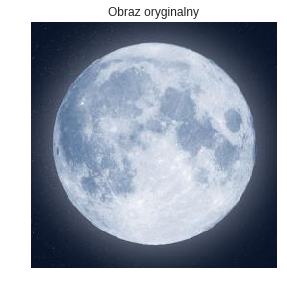

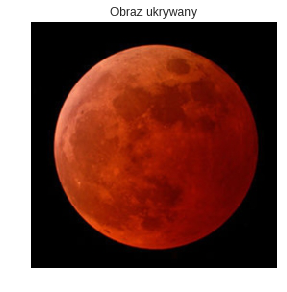

<Figure size 432x288 with 0 Axes>

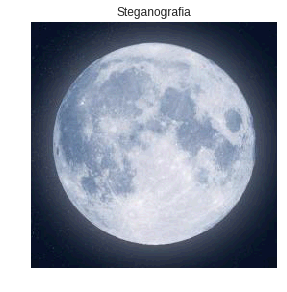

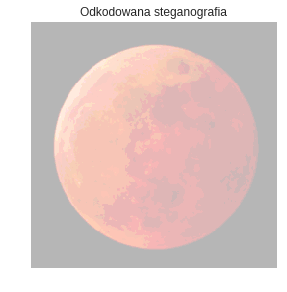

In [2]:
!wget https://i.imgur.com/qiG7Oxj.jpg
!wget https://i.imgur.com/ZX4xwvw.jpg
oryginalny = imread('qiG7Oxj.jpg')
ukrywany = imread('ZX4xwvw.jpg')
figure()
io.imshow(oryginalny)
title("Obraz oryginalny")
axis('off')
figure()
io.imshow(ukrywany)
title("Obraz ukrywany")
axis('off')

oryginalny = bitwise_and(oryginalny, 248)
ukrywany = right_shift(ukrywany, 5)

figure()
steno = oryginalny + ukrywany
figure()
io.imshow(steno)
title("Steganografia")

axis("off")
hidden = bitwise_and(steno, 7)
hidden = exposure.equalize_hist(hidden)
figure()
io.imshow(hidden)
axis('off')
title("Odkodowana steganografia")

Operacja punktowa gamma służąca do modyfikacji kontrastu obrazu (rozjaśnianie/przyciemnianie)

--2019-03-12 22:57:02--  https://cdn.mos.cms.futurecdn.net/FUE7XiFApEqWZQ85wYcAfM.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 8.252.68.124, 8.252.193.252, 8.247.118.252
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|8.252.68.124|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512465 (500K) [image/jpeg]
Saving to: ‘FUE7XiFApEqWZQ85wYcAfM.jpg’

FUE7XiFApEqWZQ85wYc 100%[===================>] 500.45K  --.-KB/s    in 0.02s   

2019-03-12 22:57:03 (20.9 MB/s) - ‘FUE7XiFApEqWZQ85wYcAfM.jpg’ saved [512465/512465]



/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


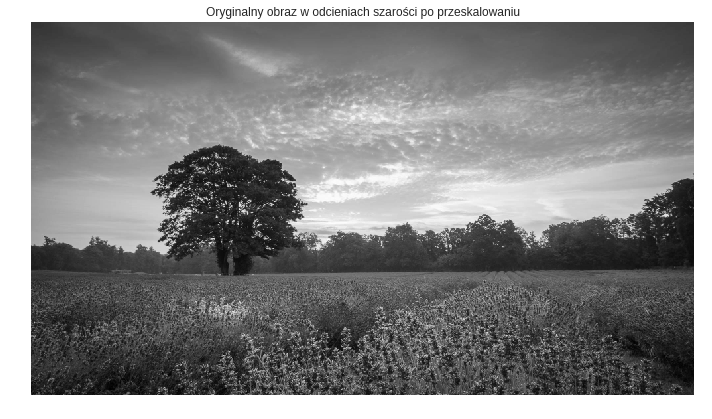

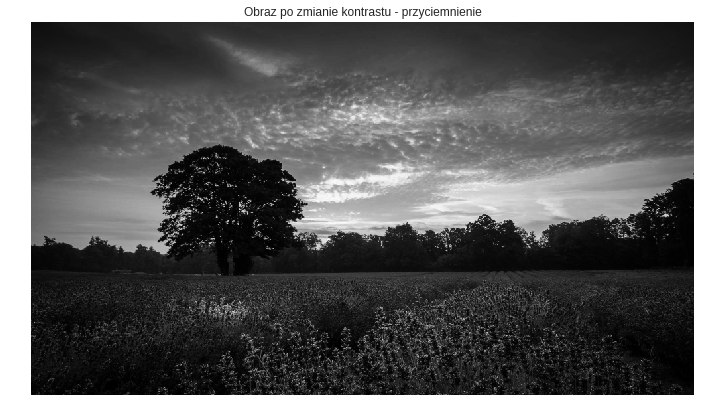

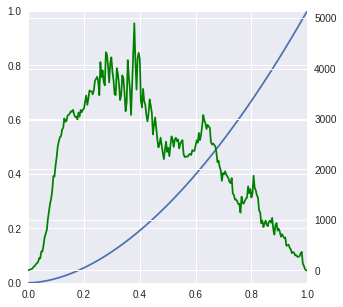

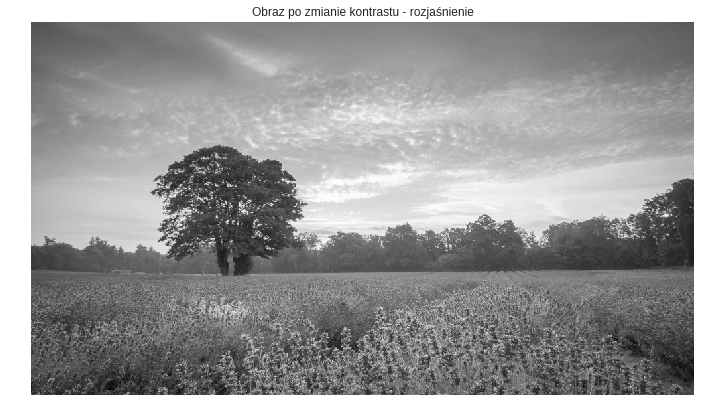

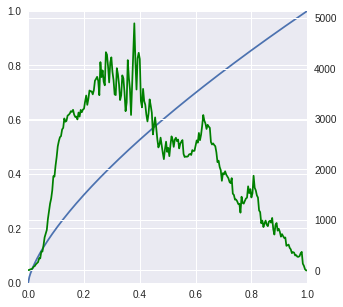

In [3]:
!wget https://cdn.mos.cms.futurecdn.net/FUE7XiFApEqWZQ85wYcAfM.jpg
  
i=io.imread('FUE7XiFApEqWZQ85wYcAfM.jpg')
i=color.rgb2grey(i)
i=transform.rescale(i,0.5)
figure(figsize(10,10))
io.imshow(i)
title("Oryginalny obraz w odcieniach szarości po przeskalowaniu")
_=axis('off')


def f(x):
  y=pow(x,G)
  return clip(y,0,1)
f=vectorize(f)

G=1.8
j=f(i)

figure(figsize(10,10))
io.imshow(j)
title("Obraz po zmianie kontrastu - przyciemnienie")
_=axis('off')

figure(figsize=(5,5))
inp=linspace(0,1,256)
out=f(inp)
plot(inp, out)
xlim(0,1)
ylim(0,1)
twinx()
h,_=exposure.histogram(i)
plot(linspace(0,1,256),h,'g')  

G=0.7
j=f(i)

figure(figsize(10,10))
io.imshow(j)
title("Obraz po zmianie kontrastu - rozjaśnienie")
_=axis('off')

figure(figsize=(5,5))
inp=linspace(0,1,256)
out=f(inp)
plot(inp, out)
xlim(0,1)
ylim(0,1)
twinx()
h,_=exposure.histogram(i)
plot(linspace(0,1,256),h,'g')  

Rotacja przekrzywionego tekstu przy pomocy analizy częstotliwości obrazu.

--2019-03-12 22:57:13--  https://i.imgur.com/U0v8A2o.png
Resolving i.imgur.com (i.imgur.com)... 151.101.52.193
Connecting to i.imgur.com (i.imgur.com)|151.101.52.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25188 (25K) [image/png]
Saving to: ‘U0v8A2o.png’

U0v8A2o.png         100%[===================>]  24.60K  --.-KB/s    in 0.007s  

2019-03-12 22:57:13 (3.55 MB/s) - ‘U0v8A2o.png’ saved [25188/25188]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: The rms_flat function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


Pozycja: 256


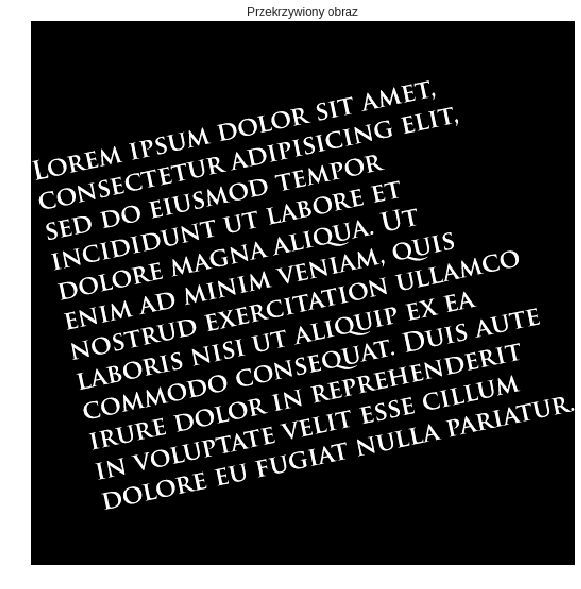

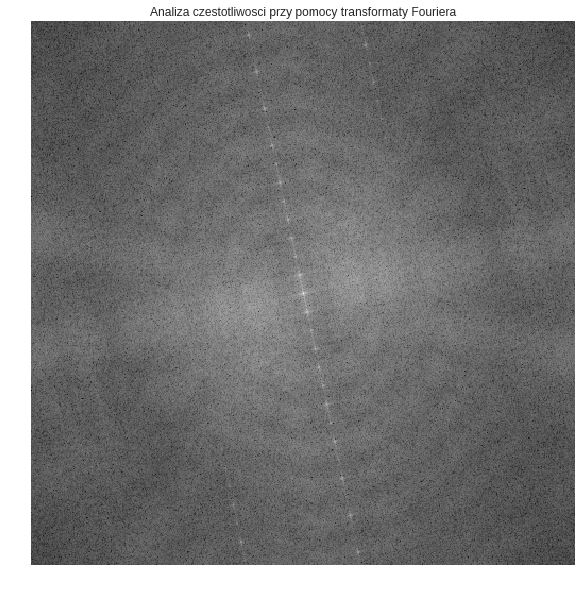

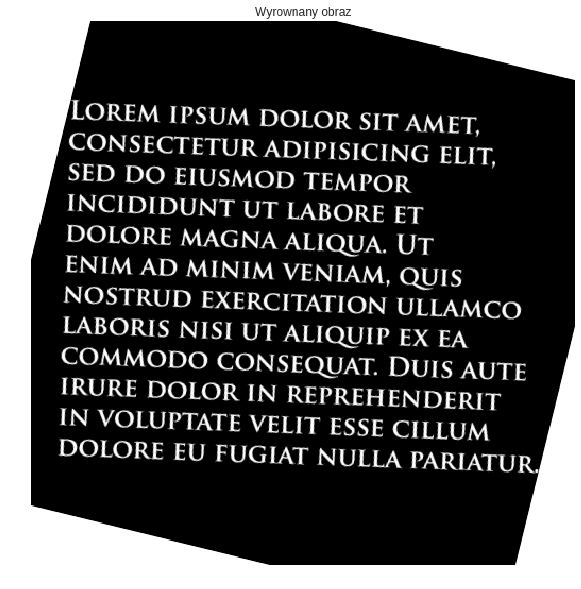

In [4]:
!wget https://i.imgur.com/U0v8A2o.png
  
I=imread('U0v8A2o.png')
I=color.rgb2gray(I)
figure(figsize=(10,10))
imshow(I)
title("Przekrzywiony obraz")
_=axis('off')

H=fft.fft2(I)
H=fft.fftshift(H)
figure(figsize=(10,10))
imshow(log(abs(H)), cmap=cm.gray)
title("Analiza czestotliwosci przy pomocy transformaty Fouriera")
_=axis('off')

H=asarray(H)
H=H-mean(H) 
r=array([rms_flat(line) for line in H])
rotation=argmax(r)
print("Pozycja: "+(str)(rotation))
pozycja = 360 - rotation
I=rotate(I,90 - pozycja)
figure(figsize=(10,10))
imshow(I)
title("Wyrownany obraz")
_=axis('off')

Zaszumienie oryginalnego obrazu szumem typu sól oraz w drugim przykładzie, szumem typu pieprz.
Następnie usunięcie szumu za pomocą operacji otwarcia oraz zamknięcia.

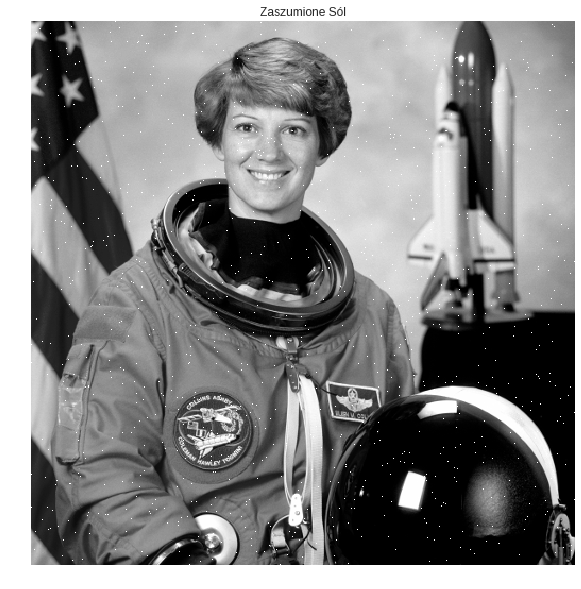

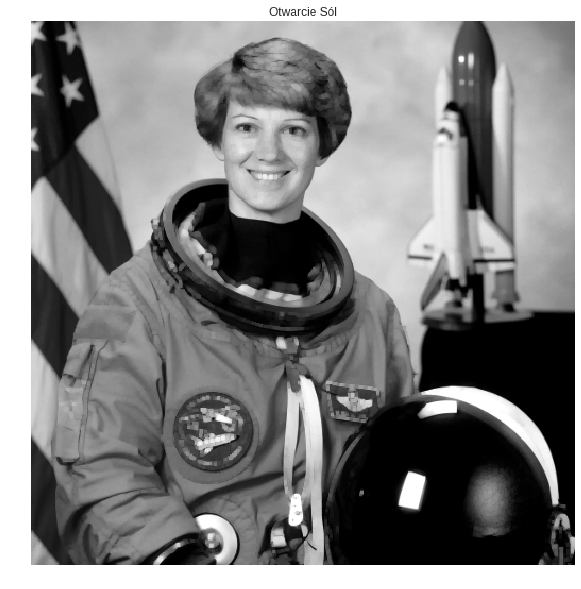

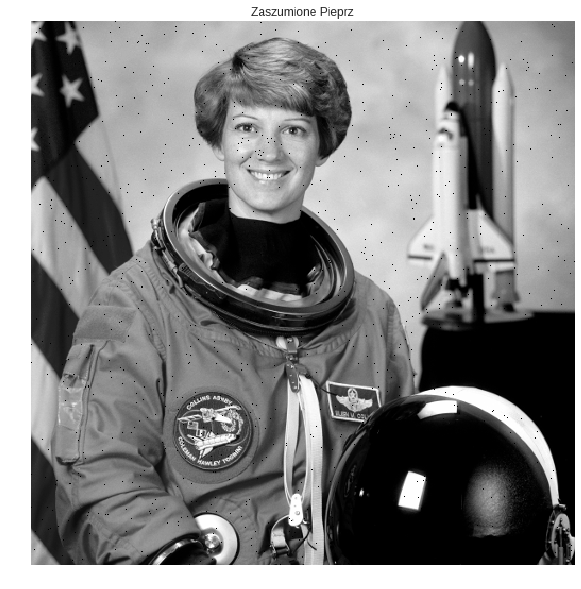

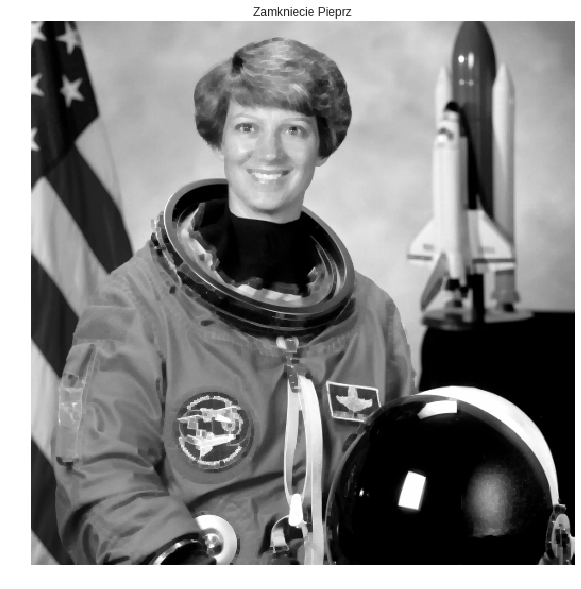

In [5]:
i=data.astronaut()
i=color.rgb2gray(i)

#Sól
x=random.randint(i.shape[0],size=1000)
y=random.randint(i.shape[1],size=1000)
i[x,y]=1

figure(figsize=(10,10))
imshow(i, cmap=cm.gray)
_=axis('off')
_=title('Zaszumione Sól')

s=morphology.square(3)
j=morphology.opening(i,s)

figure(figsize=(10,10))
imshow(j, cmap=cm.gray)
_=axis('off')
_=title('Otwarcie Sól')

#Pieprz
i[x,y]=0

figure(figsize=(10,10))
imshow(i, cmap=cm.gray)
_=axis('off')
_=title('Zaszumione Pieprz')

s=morphology.square(3)
j=morphology.closing(i,s)

figure(figsize=(10,10))
imshow(j, cmap=cm.gray)
_=axis('off')
_=title('Zamkniecie Pieprz')

Detekcja krawędzi przy pomocy transformaty Hough'a

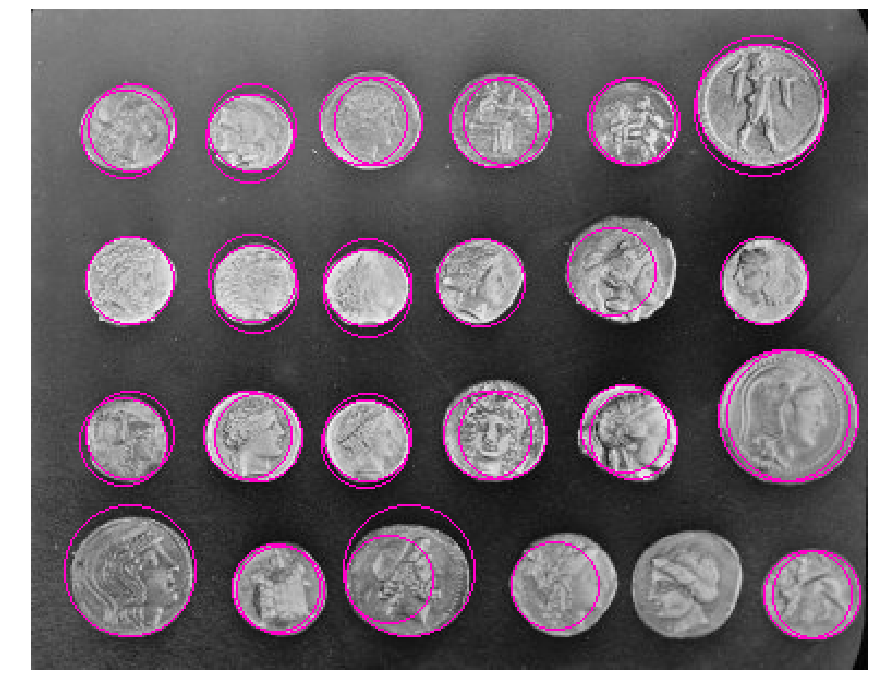

In [6]:
image = img_as_ubyte(data.coins())
edges = canny(image, sigma=4.2)

hough_radii = np.arange(10, 100, 10)
hough_res = hough_circle(edges, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=40)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(15, 15))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (255, 0, 200)

ax.imshow(image, cmap=plt.cm.gray)
_=axis('off')
plt.show()